In [1]:
import sys
sys.path.append("../../")

import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

from environments.ViZDoom_Two_Colors.env import env_vizdoom
from environments.ViZDoom_Two_Colors.env.models import CNNPolicy
from environments.ViZDoom_Two_Colors.env.doom_environment import DoomEnvironment

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
display(device)

device(type='cuda')

# Demo usage

In [2]:
SCENARIO_NAME = 'custom_scenario{:003}.cfg' # 'custom_scenario_no_pil{:003}.cfg'
SCENARIO_DIR = '../../environments/ViZDoom_Two_Colors/env_configs/'
A2C_CHECKPOINT = '../../environments/ViZDoom_Two_Colors/env/vizdoom_two_colors_a2c_agent.pth.tar'

In [3]:
env_args = {
    'simulator':'doom', 
    'scenario': SCENARIO_NAME, #custom_scenario{:003}.cfg
    'test_scenario':'', 
    'screen_size':'320X180', 
    'screen_height':64, 
    'screen_width':112, 
    'num_environments':16,# 16
    'limit_actions':True, 
    'scenario_dir': SCENARIO_DIR,
    'test_scenario_dir':'', 
    'show_window':False, 
    'resize':True, 
    'multimaze':True, 
    'num_mazes_train':16, 
    'num_mazes_test':1, # 64 
    'disable_head_bob':False, 
    'use_shaping':False, 
    'fixed_scenario':False, 
    'use_pipes':False, 
    'num_actions':0, 
    'hidden_size':128, 
    'reload_model':'', 
    'model_checkpoint': A2C_CHECKPOINT,   # two_col_p0_checkpoint_0049154048.pth.tar',  #two_col_p0_checkpoint_0198658048.pth.tar', 
    'conv1_size':16, 
    'conv2_size':32, 
    'conv3_size':16, 
    'learning_rate':0.0007, 
    'momentum':0.0, 
    'gamma':0.99, 
    'frame_skip':4, 
    'train_freq':4, 
    'train_report_freq':100, 
    'max_iters':5000000, 
    'eval_freq':1000, 
    'eval_games':50, 
    'model_save_rate':1000, 
    'eps':1e-05, 
    'alpha':0.99, 
    'use_gae':False, 
    'tau':0.95, 
    'entropy_coef':0.001, 
    'value_loss_coef':0.5, 
    'max_grad_norm':0.5, 
    'num_steps':128, 
    'num_stack':1, 
    'num_frames':200000000, 
    'use_em_loss':False, 
    'skip_eval':False, 
    'stoc_evals':False, 
    'model_dir':'', 
    'out_dir':'./', 
    'log_interval':100, 
    'job_id':12345, 
    'test_name':'test_000', 
    'use_visdom':False, 
    'visdom_port':8097, 
    'visdom_ip':'http://10.0.0.1'                 
}


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
env = DoomEnvironment(env_args, idx=0, is_train=True, get_extra_info=False)
print("Number of env actions:", env.num_actions)
obs_shape = (3, env_args['screen_height'], env_args['screen_width'])
print(obs_shape)

scene = 0
scenario = env_args['scenario_dir'] + env_args['scenario'].format(scene) # 0 % 63
config = scenario

env = env_vizdoom.DoomEnvironmentDisappear(
    scenario=config,
    show_window=False,
    use_info=True,
    use_shaping=False, #if False bonus reward if #shaping reward is always: +1,-1 in two_towers
    frame_skip=2,
    no_backward_movement=True)

policy = CNNPolicy((3, 64, 112), env_args).to(device)
checkpoint = torch.load(env_args['model_checkpoint'], map_location=lambda storage, loc: storage) 
policy.load_state_dict(checkpoint['model'])
policy.eval()

Number of env actions: 5
(3, 64, 112)
torch.Size([1, 3, 64, 112]) torch.Size([1, 16, 4, 10]) torch.Size([1, 16, 4, 10])


CNNPolicy(
  (conv_head): Sequential(
    (0): Conv2d(3, 16, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU(inplace=True)
    (4): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU(inplace=True)
  )
  (linear1): Linear(in_features=640, out_features=128, bias=True)
  (gru): GRUCell(128, 128)
  (critic_linear): Linear(in_features=128, out_features=1, bias=True)
  (dist_linear): Linear(in_features=128, out_features=5, bias=True)
)

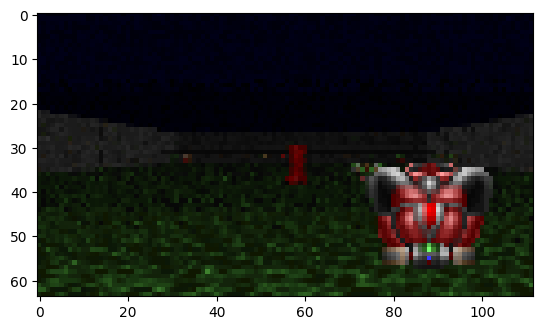

: 

In [4]:
scenario = env_args['scenario_dir'] + env_args['scenario'].format(0)
config_env = scenario
#np.random.seed(seed)

env = env_vizdoom.DoomEnvironmentDisappear(
    scenario=config_env,
    show_window=False,
    use_info=True,
    use_shaping=False, # * if False rew only +1 if True rew +1 or -1
    frame_skip=2,
    no_backward_movement=True,
    seed=2)

obs1 = env.reset()
state, reward, done, info = env.step(0)

plt.imshow(state['image'].transpose(1,2,0))
plt.show()

In [5]:
def create_vizdoom_two_colors(env_name):
    if env_name == 'doom_with_pillar':
        config_env = '../../environments/ViZDoom_Two_Colors/env_configs/custom_scenario000.cfg'
    elif env_name == 'doow_without_pillar':
        config_env = '../../environments/ViZDoom_Two_Colors/env_configs/custom_scenario_no_pil000.cfg'

    env = env_vizdoom.DoomEnvironmentDisappear(
    scenario=config_env,
    show_window=False,
    use_info=True,
    use_shaping=False, # * if False rew only +1 if True rew +1 or -1
    frame_skip=2,
    no_backward_movement=True,
    # seed=2,
    )
    return env 

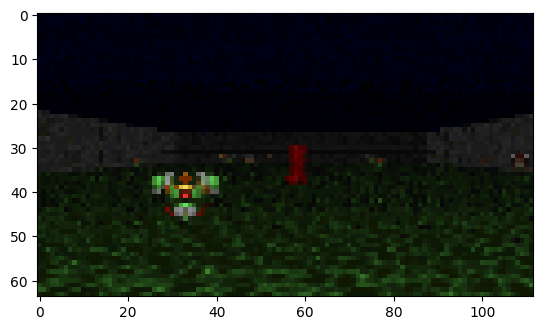

In [15]:
env = create_vizdoom_two_colors('doom_with_pillar')

obs1 = env.reset()
state, reward, done, info = env.step(0)

plt.imshow(state['image'].transpose(1,2,0))
plt.show()

In [17]:
# reds = [2, 3, 6, 8, 9, 10, 11, 14, 15, 16, 17, 18, 20, 21, 25, 26, 27, 28, 29, 31, 38, 40, 41, 42, 45,
#         46, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 61, 63, 64, 67, 68, 70, 72, 73, 74, 77, 80, 82, 84, 
#         86, 88, 89, 90, 91, 92, 97, 98, 99, 100, 101, 103, 106, 108, 109, 113, 115, 116, 117, 120, 
#         123, 124, 125, 126, 127, 128, 129, 133, 134, 136, 139, 140, 142, 144, 145, 147, 148, 151, 152, 
#         153, 154, 156, 157, 158, 159, 161, 164, 165, 170, 171, 173]

# greens = [0, 1, 4, 5, 7, 12, 13, 19, 22, 23, 24, 30, 32, 33, 34, 35, 36, 37, 39, 43, 44, 47, 48, 56, 57,
#           62, 65, 66, 69, 71, 75, 76, 78, 79, 81, 83, 85, 87, 93, 94, 95, 96, 102, 104, 105, 107, 110, 111, 
#           112, 114, 118, 119, 121, 122, 130, 131, 132, 135, 137, 138, 141, 143, 146, 149, 150, 155, 160, 162, 
#           163, 166, 167, 168, 169, 172, 175, 176, 177, 182, 183, 187, 190, 192, 193, 195, 199, 204, 206, 208, 
#           209, 210, 212, 215, 216, 218, 219, 220, 221, 223, 224, 225]

# print(len(reds), len(greens))

In [18]:
# red_rews, red_times = [], []

# for seed in tqdm([0]):    

#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     env = DoomEnvironment(env_args, idx=0, is_train=True, get_extra_info=False)
#     obs_shape = (3, env_args['screen_height'], env_args['screen_width'])

#     scene = 0
#     scenario = env_args['scenario_dir'] + env_args['scenario'].format(scene) # 0 % 63
#     config = scenario

#     env = env_vizdoom.DoomEnvironmentDisappear(
#         scenario=config,
#         show_window=False,
#         use_info=True,
#         use_shaping=False, #if False bonus reward if #shaping reward is always: +1,-1 in two_towers
#         frame_skip=2,
#         no_backward_movement=True,
#         seed=seed)

#     policy = CNNPolicy((3, 64, 112), env_args).to(device)
#     checkpoint = torch.load(env_args['model_checkpoint'], map_location=lambda storage, loc: storage) 
#     policy.load_state_dict(checkpoint['model'])
#     policy.eval()

#     obs = env.reset()
#     state = torch.zeros(1, env_args['hidden_size']).to(device)
#     mask = torch.ones(1,1).to(device)
#     done = False
#     total_rew = 0

#     for t in count():
#         result = policy(torch.from_numpy(obs['image']).unsqueeze(0).to(device), state, mask)
#         action, state = result['actions'], result['states']
        
        
#         obs, reward, done, info = env.step(action.item())
#         total_rew += reward


#         is_red = info['is_red']

#         if done or t == 4200-1:
#             red_rews.append(total_rew)
#             red_times.append(t)
#             break

In [19]:
# green_rews, green_times = [], []

# for seed in tqdm(greens[::2]):    

#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     env = DoomEnvironment(env_args, idx=0, is_train=True, get_extra_info=False)
#     obs_shape = (3, env_args['screen_height'], env_args['screen_width'])

#     scene = 0
#     scenario = env_args['scenario_dir'] + env_args['scenario'].format(scene) # 0 % 63
#     config = scenario

#     env = env_vizdoom.DoomEnvironmentDisappear(
#         scenario=config,
#         show_window=False,
#         use_info=True,
#         use_shaping=False, #if False bonus reward if #shaping reward is always: +1,-1 in two_towers
#         frame_skip=2,
#         no_backward_movement=True,
#         seed=seed)

#     policy = CNNPolicy((3, 64, 112), env_args).to(device)
#     checkpoint = torch.load(env_args['model_checkpoint'], map_location=lambda storage, loc: storage) 
#     policy.load_state_dict(checkpoint['model'])
#     policy.eval()

#     obs = env.reset()
#     state = torch.zeros(1, env_args['hidden_size']).to(device)
#     mask = torch.ones(1,1).to(device)
#     done = False
#     total_rew = 0

#     for t in count():
#         result = policy(torch.from_numpy(obs['image']).unsqueeze(0).to(device), state, mask)
#         action, state = result['actions'], result['states']
        
        
#         obs, reward, done, info = env.step(action.item())
#         total_rew += reward


#         is_red = info['is_red']

#         if done or t == 4200-1:
#             green_rews.append(total_rew)
#             green_times.append(t)
#             break

In [20]:
# red_times = [el*2 for el in red_times]
# green_times = [el*2 for el in green_times]

In [21]:
# print(np.mean(red_rews), np.mean(red_times))

# print(np.mean(green_rews), np.mean(green_times))

# print(np.mean(red_rews+green_rews), np.mean(red_times+green_times))

In [22]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# env = DoomEnvironment(env_args, idx=0, is_train=True, get_extra_info=False)
# obs_shape = (3, env_args['screen_height'], env_args['screen_width'])

# scene = 0
# scenario = env_args['scenario_dir'] + env_args['scenario'].format(scene) # 0 % 63
# config = scenario

# env = env_vizdoom.DoomEnvironmentDisappear(
#     scenario=config,
#     show_window=False,
#     use_info=True,
#     use_shaping=False, #if False bonus reward if #shaping reward is always: +1,-1 in two_towers
#     frame_skip=2,
#     no_backward_movement=True)

# policy = CNNPolicy((3, 64, 112), env_args).to(device)
# checkpoint = torch.load(env_args['model_checkpoint'], map_location=lambda storage, loc: storage) 
# policy.load_state_dict(checkpoint['model'])
# policy.eval()

# NUMBER_OF_TRAIN_DATA = 5000 # 5000 - number of trajectories in training dataset
# EPISODE_TIMEOUT = 2100 # 90

# returns_red, returns_green = [], []

# for i in tqdm(range(NUMBER_OF_TRAIN_DATA)):
#     obsList, actList, rewList, doneList, isRedList = [], [], [], [], []
#     times = []
#     obs = env.reset()
#     state = torch.zeros(1, env_args['hidden_size']).to(device)
#     mask = torch.ones(1,1).to(device)
#     done = False

#     for t in count():
#         times.append(t)
#         obsList.append(obs['image'])
#         result = policy(torch.from_numpy(obs['image']).unsqueeze(0).to(device), state, mask)
#         action, state = result['actions'], result['states']
        
        
#         obs, reward, done, info = env.step(action.item())


#         is_red = info['is_red']
#         rewList.append(reward)
#         actList.append(action.item())
#         doneList.append(int(done))
#         isRedList.append(is_red)

#         if done or t == EPISODE_TIMEOUT-1:

#             if is_red == 1.0:
#                 returns_red.append(np.sum(rewList))
#             else:
#                 returns_green.append(np.sum(rewList))

#             break
    
#     DATA = {'obs': np.array(obsList), # (1152, 3, 64, 112)
#             'action': np.array(actList),
#             'reward': np.array(rewList),
#             'done': np.array(doneList),
#             'is_red': np.array(isRedList)}

#     file_path = f'../VizDoom_data/iterative_data/train_data_{i}.npz'
#     np.savez(file_path, **DATA)
    

# env.close()

In [23]:
# DATA['obs'].shape

In [24]:
# np.mean(returns_red), np.mean(returns_green)

In [26]:
# episode = np.load(f'../VizDoom_data/iterative_data/train_data_{4999}.npz')
# episode = {key: episode[key] for key in episode.keys()}

In [27]:
# episode.keys()

In [28]:
# from tqdm import tqdm

# directory = '../VizDoom_data/iterative_data/'
# file_list = os.listdir(directory)

# rews = []

# for file in tqdm(file_list):
#     file_path = os.path.join(directory, file)
#     data = np.load(file_path)
    
#     rews.append(data['reward'].sum())

In [29]:
# from tqdm import tqdm

# directory = '../VizDoom_data/iterative_data/'
# file_list = os.listdir(directory)

# is_red = []

# for file in tqdm(file_list):
#     file_path = os.path.join(directory, file)
#     data = np.load(file_path)
    
#     is_red.append(int(data['is_red'].mean() == 1.0))

In [30]:
# np.sort(np.unique(rews))[::-1]

In [31]:
# unique, counts = np.unique(is_red, return_counts=True)
# print(unique, counts)

In [32]:
# scene = 0
# scenario = env_args['scenario_dir'] + env_args['scenario'].format(scene)
# config_env = scenario
# #np.random.seed(seed)

# is_red = 0
# is_green = 0
# seed = 0

# reds = []
# greens = []
# while is_green <= 100 or is_red <= 100:
#     env = env_vizdoom2.DoomEnvironmentDisappear(
#         scenario=config_env,
#         show_window=False,
#         use_info=True,
#         use_shaping=False, # if False rew only +1 if True rew +1 or -1
#         frame_skip=2,
#         no_backward_movement=True,
#         seed=seed)

#     obs1 = env.reset()
#     state, reward, done, info = env.step(0)
#     if info['is_red'] == 1.0:
#         is_red += 1
#         if is_red <= 100:
#             reds.append(seed)
#     else:
#         is_green += 1
#         if is_green <= 100:
#             greens.append(seed)

#     seed += 1

#     env.close()
    
# print(is_red, is_green)

In [33]:
# len(reds), len(greens)

In [150]:
for batch in tqdm(dataloader, total=len(dataloader)):
    x, a, rtg, done, timesteps, mask = batch
    print(x.shape, a.shape, rtg.shape, done.shape, timesteps.shape, mask.shape)
    break

  0%|          | 0/39 [00:00<?, ?it/s]

torch.Size([128, 90, 3, 64, 112]) torch.Size([128, 90, 1]) torch.Size([128, 90, 1]) torch.Size([128, 90]) torch.Size([128, 90]) torch.Size([128, 90])


  0%|          | 0/39 [00:05<?, ?it/s]


In [34]:
# from moviepy.editor import ImageSequenceClip, VideoFileClip
# import numpy as np
# import cv2

# desired_resolution = (945, 540)
# original_aspect_ratio = 112 / 64
# width = int(desired_resolution[0] * original_aspect_ratio)
# height = desired_resolution[1]

# # Assuming 'states1' is a list of numpy arrays representing images
# observations = [np.squeeze(o).transpose(1, 2, 0) for o in episode['obs']]

# # Create ImageSequenceClip
# clip = ImageSequenceClip(observations, fps=24)
# clip = clip.resize(width=width, height=height)

# # Add text to each frame
# # text = 'text'
# font = cv2.FONT_HERSHEY_SIMPLEX
# font_scale = 1
# font_color = (255, 255, 255)
# thickness = 2

# # Create a list to store the modified frames
# modified_frames = []

# for idx, frame in enumerate(clip.iter_frames()):
#     modified_frame = cv2.putText(frame, str(times[idx]), (20, 50), font, font_scale, font_color, thickness, cv2.LINE_AA)
#     # modified_frame = cv2.putText(frame, str(health[idx]), (120, 50), font, font_scale, font_color, thickness, cv2.LINE_AA)
#     # modified_frame = cv2.putText(frame, str(np.round(rews[idx], 2)), (240, 50), font, font_scale, font_color, thickness, cv2.LINE_AA)

#     modified_frames.append(modified_frame)

# # Create a new ImageSequenceClip with the modified frames
# modified_clip = ImageSequenceClip(modified_frames, fps=clip.fps)

# # Display the modified clip
# modified_clip.ipython_display(maxduration=120)


In [35]:
# scenario = env_args['scenario_dir'] + env_args['scenario'].format(0)
# config_env = scenario
# #np.random.seed(seed)

# env = env_vizdoom.DoomEnvironmentDisappear(
#     scenario=config_env,
#     show_window=False,
#     use_info=True,
#     use_shaping=False, # if False rew only +1 if True rew +1 or -1
#     frame_skip=2,
#     no_backward_movement=True,
#     seed=2)

# obs1 = env.reset()
# state, reward, done, info = env.step(0)

# plt.imshow(state['image'].transpose(1,2,0))
# plt.show()